In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [3]:
image_shape = (28, 28)

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5), (0.5))])

batch_size = 128

classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress',
           'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

In [4]:
import sys
sys.path.append('/home/oralph/repos/fashion-mnist')

In [5]:
from utils import mnist_reader

In [6]:
data_path = '/home/oralph/repos/fashion-mnist/data/fashion'
X, y = mnist_reader.load_mnist(data_path, kind='train')
X_test, y_test = mnist_reader.load_mnist(data_path, kind='t10k')

In [7]:
X_copy, y_copy = X.copy(), y.copy()
X_test_copy, y_test_copy = X_test.copy(), y_test.copy()

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_copy, y_copy, test_size=0.33, random_state=0)

In [9]:
X_train[0].flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False

In [10]:
X_train[0].shape

(784,)

In [11]:
image = X_train[0].reshape((28, 28))

In [12]:
image.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False

In [13]:
image.shape

(28, 28)

In [14]:
image = transform(image)

In [35]:
image

tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1

In [15]:
y_train[0]

7

In [16]:
from torch.utils.data import Dataset

class CustomFashionMNISTDataset(Dataset):
    def __init__(self, images, labels, image_shape, image_transform):
        self.images = images
        self.labels = labels
        self.image_shape = image_shape
        self.image_transform = image_transform

    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, i):
        image = self.images[i].reshape(self.image_shape)
        label = self.labels[i]

        if self.image_transform:
            image = self.image_transform(image)
        
        return image, label

In [17]:
from torch.utils.data import DataLoader

train_dataset = CustomFashionMNISTDataset(X_train, y_train, image_shape, transform)

train_dataloader = DataLoader(train_dataset, batch_size, shuffle=True)

val_dataset = CustomFashionMNISTDataset(X_val, y_val, image_shape, transform)

val_dataloader = DataLoader(val_dataset, batch_size)

test_dataset = CustomFashionMNISTDataset(X_test_copy, y_test_copy, image_shape, transform)

test_dataloader = DataLoader(test_dataset, batch_size)

In [18]:
train_dataset.__getitem__(0)

(tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.000

In [19]:
len(train_dataset)

40200

In [33]:
len(val_dataset)

19800

In [34]:
len(test_dataset)

10000

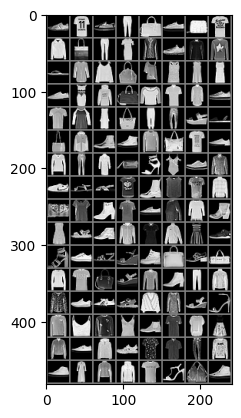

Sneaker T-shirt/top Sneaker Trouser Bag   Sneaker Bag   T-shirt/top Coat  Bag   Trouser Dress Shirt Sneaker Shirt Pullover Sandal Shirt Pullover Bag   Shirt T-shirt/top Dress Dress Sneaker Dress Pullover Bag   T-shirt/top T-shirt/top Coat  Sneaker T-shirt/top T-shirt/top Dress Bag   Trouser Trouser Sandal Sandal Bag   Coat  Ankle Boot Sneaker Pullover Bag   T-shirt/top Sneaker Pullover Trouser Coat  Bag   Sandal T-shirt/top Sneaker Shirt Sneaker Sandal Sandal T-shirt/top Ankle Boot Shirt T-shirt/top Shirt Bag   T-shirt/top Ankle Boot T-shirt/top Sneaker Pullover T-shirt/top Ankle Boot Dress Sandal Ankle Boot Coat  T-shirt/top Coat  Dress Sneaker Sandal Sneaker Sandal Sandal Ankle Boot Bag   Ankle Boot Bag   Pullover T-shirt/top Bag   Sandal Shirt Ankle Boot Trouser Coat  Shirt Sneaker Sneaker Sandal Shirt Pullover Sandal Sandal Pullover T-shirt/top Pullover T-shirt/top Ankle Boot T-shirt/top Shirt Dress Coat  Sneaker Coat  Sandal Shirt Shirt Trouser Pullover Sneaker Dress Pullover Coat

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(image):
    image = image / 2 + 0.5     # unnormalize
    np_image = image.numpy()    # convert back from tensor
    plt.imshow(np.transpose(np_image, (1, 2, 0)))   # transpose image to correct shape for visualisation
    plt.show()


# get some random training images
images, labels = next(iter(train_dataloader))

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [21]:
# Examine a sample
images, labels = next(iter(train_dataloader))
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([128, 1, 28, 28])
torch.Size([128])


In [22]:
# Examine a sample
images, labels = next(iter(val_dataloader))
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([128, 1, 28, 28])
torch.Size([128])


In [23]:
# Examine a sample
images, labels = next(iter(test_dataloader))
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([128, 1, 28, 28])
torch.Size([128])


In [24]:
from torchvision.models import resnet18, resnet34, resnet50
from torch import nn
model = resnet18(weights=None).to(device)

# Convert model to grayscale
model.conv1 = torch.nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False).to(device)

# Update the fully connected layer based on the number of classes in the dataset
model.fc = torch.nn.Linear(model.fc.in_features, len(classes)).to(device)


In [25]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [26]:
for epoch in range(2):  # loop over the dataset multiple times
    # initiate model training
    print(f'Training - epoch: {epoch + 1}')
    model.train()

    running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # print every 100 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 100:.3f}')
            running_loss = 0.0

    # initiate model validation
    print(f'Validation - epoch {epoch}')
    model.eval()

    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in val_dataloader:
            images, labels = data[0].to(device), data[1].to(device)
            # calculate outputs by running images through the network
            outputs = model(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Accuracy of the network on the dataset: {100 * correct // total} %')

print('Finished Training')

Training - epoch: 1
[1,   100] loss: 0.873
[1,   200] loss: 0.486
[1,   300] loss: 0.424
Validation - epoch 0
Accuracy of the network on the 10000 test images: 85 %
Training - epoch: 2
[2,   100] loss: 0.352
[2,   200] loss: 0.332
[2,   300] loss: 0.332
Validation - epoch 1
Accuracy of the network on the 10000 test images: 86 %
Finished Training


In [27]:
PATH = './fashion_mnist_model.pth'
torch.save(model.state_dict(), PATH)

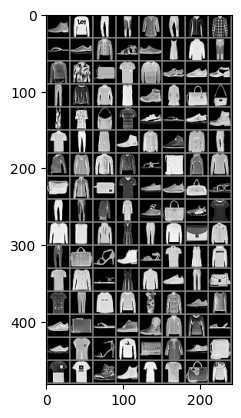

GroundTruth:  Ankle Boot Pullover Trouser Trouser


In [28]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

images, labels = next(iter(test_dataloader))

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [29]:
model = resnet18(weights=None).to(device)

# Convert model to grayscale
model.conv1 = torch.nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False).to(device)

# Update the fully connected layer based on the number of classes in the dataset
model.fc = torch.nn.Linear(model.fc.in_features, len(classes)).to(device)
model.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [30]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  Pullover Bag   Sandal Bag  


In [31]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in test_dataloader:
        images, labels = data[0].to(device), data[1].to(device)
        # calculate outputs by running images through the network
        outputs = model(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 85 %


In [32]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in test_dataloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: T-shirt/top is 77.0 %
Accuracy for class: Trouser is 96.3 %
Accuracy for class: Pullover is 79.5 %
Accuracy for class: Dress is 87.5 %
Accuracy for class: Coat  is 71.0 %
Accuracy for class: Sandal is 94.1 %
Accuracy for class: Shirt is 61.3 %
Accuracy for class: Sneaker is 94.5 %
Accuracy for class: Bag   is 96.4 %
Accuracy for class: Ankle Boot is 94.5 %
